### VID 235 LOGISTICC REGRESSION SIMPLE EXAMPLE IN PYTHON

# SAT ADMISSION PROBLEM
#### import RELEVANT LIB

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sns.set() IS used to overwrite the default matplotlib settings with a beautiful seaborn one

In [2]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# CONVERT THE DUMMY (YES AND NO) FOR IT TO BE USED FOR QNTITATIVE ANALYSIS
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### VARIABLE

In [4]:
# VISUALISE DATA
y = data['Admitted'] # outcon
x1 = data ['SAT'] # input

### PLOT DATA (SCATTER PLOT)

In [5]:
#SUMMARY TABLE
x = sm.add_constant(x1)
reg= sm.OLS(y,x)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.98e-43
Time:                        05:16:39   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

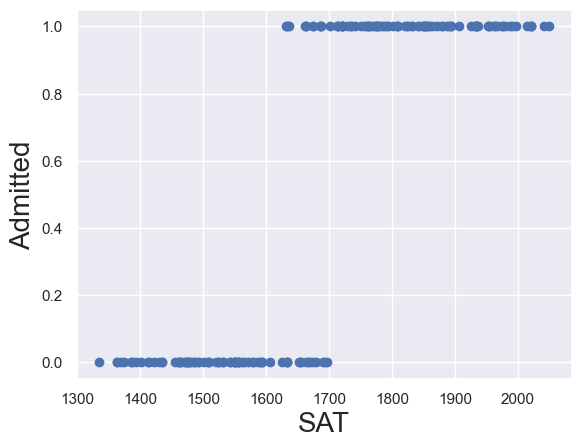

In [6]:
# PLOTING THE Y AGAINST THE FITTED X (X1)
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

#### ADD A LINEAR REG. LINE

C:\Users\USER\AppData\Local\Temp\ipykernel_2024\1365431970.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results.params[1]+results.params[0]


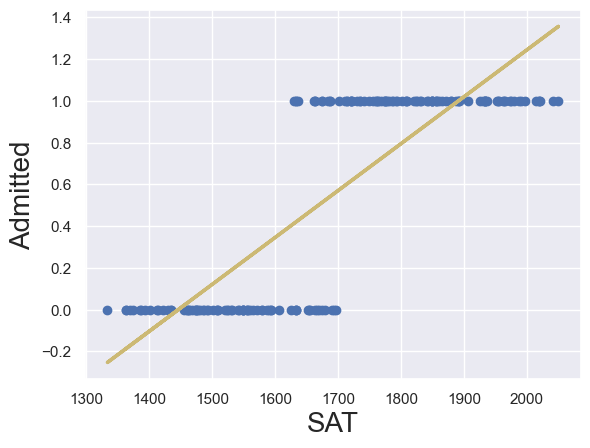

In [7]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
#x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
#reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
#results_lin = reg_lin.fit()

# Create a scatter plot
#plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
#y_hat = x1*results_lin.params[1]+results_lin.params[0]
#plt.plot(x1,y_hat,lw=2.5,color='C8')
#plt.xlabel('SAT', fontsize = 20)
#plt.ylabel('Admitted', fontsize = 20)
#plt.show()

     # OR

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results.params[1]+results.params[0]     
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

#### THE OLS LINEARITY ASSUMPTION IS VIOLATED. This is bc line predicts values outside the natural domain of Admission
#### Lin. Reg is not good for this kind of analysis

### OUR DATA IS NON-LINEAR ND MUST BE APPROACHED NON LINEARLY
#### plot logistics Reg. Curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\USER\AppData\Local\Temp\ipykernel_2024\1110588912.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


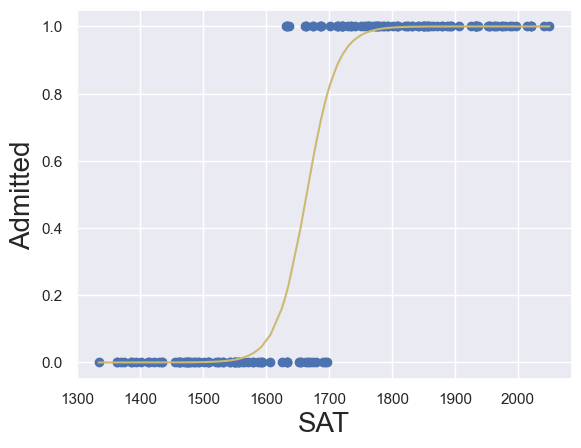

In [8]:
reg_log = sm.Logit(y,x)  
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))
    
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [9]:
# THE PLOT IS BOUND BY TWO OUTCOMES 1 ND 0
# the fn shows prob of admission given an SAT score. When SAT score is relattively low, Prob of getting admitted is zero and 
# vice versa
#there is uncertainty of admission in scores bw 1600 nd 1750 eg SAT score of 1650 has a 50% chance of admission and SAT score of 1700 has 80%
# chance on admission

#### VID 237 BUILDING LOG REG(LOGIT MODEL)


In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sns.set() IS used to overwrite the default matplotlib settings with a beautiful seaborn one
from scipy import stats
stats.chisqprob=lambda chisq,df: stats.chi2.sf(chisq,df) 

In [11]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [12]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [13]:
# VISUALISE DATA
y = data['Admitted'] # outcon
x1 = data ['SAT'] # input

#### REGRESSION


In [14]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.7992
Time:                        05:16:44   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### VID 239
#### AN INVLUABLE CODING TIP

In [16]:
# TO GET THE REG SUMMARY IN CODE
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### VID 238 LOG REG EXERCISE
#### The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

#### IMPORT RELEVANT LIBRARY

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#### LOAD DATA

In [18]:
raw_data = pd.read_csv('Example_bank_data.csv')
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


#### MAP DATA (YES:1, NO:0)

In [19]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.\n",
data = raw_data.copy()   
# Remove the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no' values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})

In [20]:
data.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


#### DESCRIPTIVE STATS

In [21]:
data.describe()

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


#### DECLARE DATA

In [22]:
#We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable
# into 0s and 1s in order to perform a logistic regression.

# VISUALISE DATA
y = data['y'] # outcon
x1 = data ['duration'] # input

#### REGRESSION


In [23]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


#### SUMARY TABLE

In [24]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2121
Time:                        05:16:47   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

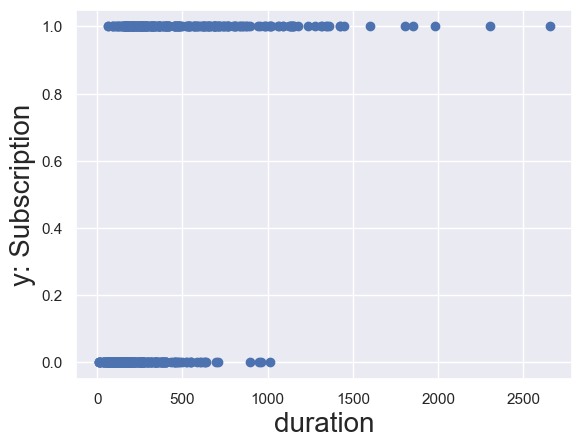

In [25]:
# PLOTING THE Y AGAINST THE FITTED X (X1)

plt.scatter(x1,y,color='C0')
plt.xlabel('duration',fontsize=20)
plt.ylabel('y: Subscription',fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\USER\AppData\Local\Temp\ipykernel_2024\2483855096.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


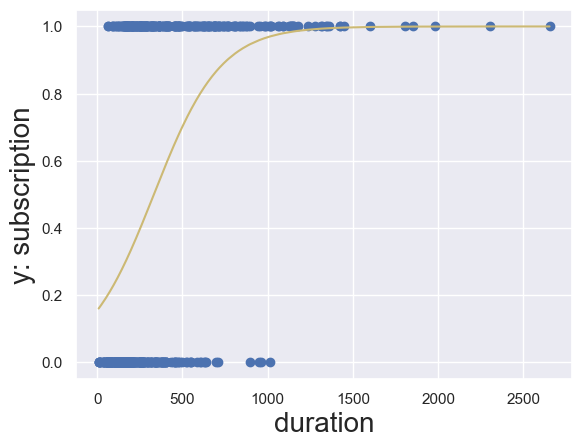

In [26]:
# PLOT LOGISTIC REG CURVE
reg_log = sm.Logit(y,x)  
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))
    
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('duration', fontsize = 20)
plt.ylabel('y: subscription', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### VID 241 EXERCISE Understanding Logistic Regression

In [27]:
#IMPORT RELEVANT LIBRARY
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [28]:
#LOAD DATA
raw_data = pd.read_csv('Bank_data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [29]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()   
# Remove the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no' values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


#### DECLARE DEPENDENT AND INDEPENDENT VARIABLE

In [30]:
y = data['y']
x1 = data['duration']

#### Run the simple logistics Reg.
#### Interpretation

In [31]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.2121
Time:                        05:16:52   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [32]:
#The dependent variable is 'duration'. The model used is a Logit regression (logistic in common lingo), while the method - Maximum Likelihood Estimation (MLE).
#It has clearly converged after classifyin 518 observations.
#The Pseudo R-squared is 0.21 which is within the 'acceptable region'
#The duration variable is significant and its coefficient is 0.0051.
#The constant is also significant and equals: -1.70"

###  VID 243 Binary predictors in logistic REG

In [33]:
#IMPORT RELEVANT LIBRARY
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [34]:
#LOAD DATA
raw_data = pd.read_csv('2.02.+Binary+predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


####  map variables

In [35]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Female':1,'Male':0})     
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


### Declare Variables and create Reg.

In [36]:
y=data['Admitted']
x1=data['Gender']

In [37]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.1659
Time:                        05:16:53   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [38]:
# LLR p-value:	6.283e-10 the model is significant
# And Gender Variable is significant (0.000)

### Interpretation

In [39]:
# The model is log (odd)= -0.64 +2.08*Gender

#log(odds)= -0.64 +2.08 * Gender
#lets make 2 equations
#log(odds2)-0.64 +2.08 * Gender2 - log(odds1)= -0.64 +2.08 * Gender1

#log(odds2/odds1)= 2.08 * (Gender2 - Gender1)
#Gender is only 2 possible values 1 nd 0 so there is only a unit change no other option. odds2 are basically the odds of a female getting admitted nd 
# vice versa for male (odd1)
#log(odds2/odds1)= 2.08 * (1 - 0)
#log(odds2/odds1)= 2.08 

In [40]:
#taking exp of both sides we get the odds of a female to get Admitted is 
# Odds2 (female)= 7.99 * odds1(male)
print((np.exp(2.0786).round(3)),'times odds of those of male getting admmitted ')
## THATS THE INTERPRETATION OF BINARY PREDICTORS COEFFICIENT

7.993 times odds of those of male getting admmitted 


#### Lets include both predictors

In [41]:
y=data['Admitted']
x1=data[['SAT','Gender']]

In [42]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()
# We get a regression wth higher log liklihood (meaning its a better one) and it makes sense since SAT is an outstanding predictor
# the gender variable is also significant but we no longer have 3 zeros after the point. the new cofficient of gender is 1.94

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.8249
Time:                        05:16:54   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Interpretation

In [43]:
# the exponential of Gender coef 1.9449 is 6.9
print((np.exp(1.9449).round(3)))
# Given same SAT score a female is approximately 7 times more likely to be admitted than a male
# inference is that in this particular degree it seems its much easier for female to enter than males
# ALWAYS INTERPRETE THE RESULTS BASED ON THE CONTEXT, IF THEY SEEM ILLOGICAL IT MAY BE WORTH REVISITING UR MODEL RATHER THAN FOLLOWING IT BLINDLY

6.993


###  EXERCISE 244 BINARY PREDICTORS IN LOG. REG
#### find the odds of 'duration' WHAT DO THEY TELL U

In [44]:
#IMPORT RELEVANT LIBRARY
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [45]:
#LOAD DATA
raw_data = pd.read_csv('Bank_data.csv')
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()   
# Remove the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no' values to 0.
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


#### Declare Variable


In [46]:
#x 1=data[['duration','interest_rate','credit','march','previous']]
# To avoid writing them out every time, we save the names of the estimators of our model in a list
estimators=['duration','interest_rate','credit','march','previous']
y=data['y']
x1=data[estimators]

#### Run the regression

In [47]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.5143
Time:                        05:16:55   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

#### Accuracy check (confusion matrix)

In [48]:
# Show predicted table
# This is a method to change the formatting of np arrays so they are so legible
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict() #this are the predicted values

array([0.11, 0.94, 0.01, 0.81, 0.01, 0.53, 0.03, 0.00, 0.71, 0.07, 0.95,
       0.50, 0.89, 0.10, 0.08, 0.82, 0.87, 0.85, 0.37, 0.76, 0.97, 0.87,
       0.13, 0.10, 0.65, 0.09, 0.77, 0.76, 0.90, 0.04, 0.02, 0.12, 0.27,
       0.71, 0.06, 0.01, 0.99, 0.06, 1.00, 0.54, 0.06, 0.84, 0.06, 0.01,
       0.87, 0.55, 0.00, 0.15, 0.16, 0.83, 0.72, 0.05, 0.03, 0.05, 0.01,
       0.81, 0.09, 0.80, 0.98, 0.84, 0.04, 0.11, 0.99, 0.76, 0.16, 0.31,
       0.05, 0.06, 1.00, 0.07, 0.02, 0.72, 0.14, 0.97, 0.87, 0.13, 0.67,
       0.05, 0.01, 0.03, 0.92, 0.79, 0.89, 0.13, 0.19, 0.98, 0.64, 0.86,
       0.74, 0.03, 0.08, 0.03, 0.71, 0.64, 0.95, 0.97, 0.97, 0.03, 0.98,
       0.06, 0.99, 0.07, 0.99, 0.69, 0.28, 0.36, 0.20, 0.70, 0.73, 0.03,
       0.99, 0.41, 0.16, 0.05, 0.94, 0.02, 0.04, 0.90, 0.50, 0.14, 0.10,
       0.00, 0.92, 1.00, 0.33, 0.98, 0.93, 0.84, 0.70, 0.67, 0.05, 0.26,
       0.81, 0.79, 0.81, 0.08, 0.22, 0.74, 0.11, 0.01, 0.01, 0.01, 0.23,
       0.79, 0.23, 1.00, 0.23, 0.01, 1.00, 0.54, 0.

In [49]:
np.array(data[estimators])

array([[117.00, 1.33, 0.00, 1.00, 0.00],
       [274.00, 0.77, 0.00, 0.00, 1.00],
       [167.00, 4.86, 0.00, 1.00, 0.00],
       ...,
       [290.00, 0.88, 0.00, 0.00, 0.00],
       [473.00, 0.88, 0.00, 0.00, 1.00],
       [142.00, 4.96, 0.00, 0.00, 0.00]])

In [50]:
results_log.pred_table()

array([[218.00, 41.00],
       [30.00, 229.00]])

In [51]:
# format the 4 entries above
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [52]:
cm= np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.862934362934363

#### A scatter plot of x1 (Duration, no constant) and y (Subscribed)

In [53]:
y=data['y']
x1=data['duration']

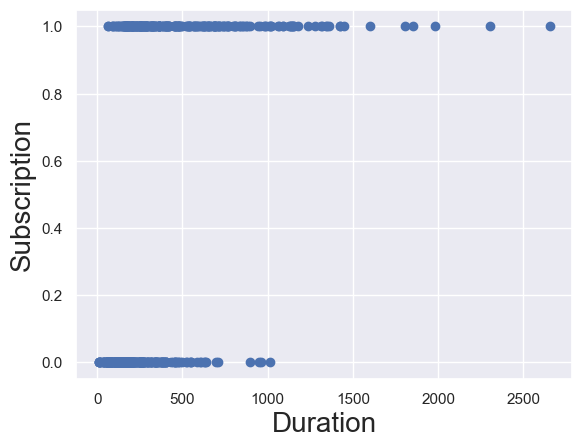

In [54]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [55]:
# The odds of duration are the exponential of the log odds from the summary table
np.exp(0.0051)

1.005113027136717

In [56]:
# The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, 
# a change in 1 day would barely affect the regression.
# Note that we could have inferred that from the coefficient itself
# Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

### VID 245 CALCULATING ACCURACY OF THE MODEL

In [57]:
#IMPORT RELEVANT LIBRARY
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [58]:
#LOAD DATA
raw_data = pd.read_csv('2.02.+Binary+predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [59]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Female':1,'Male':0})     
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


##### DECLARE VARIABLE AND CREATE REGRESSION

In [60]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [61]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.8249
Time:                        05:16:58   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
#ODDS OF A FEMALE GETTING ADMITTED
np.exp(1.9449)

6.992932526814459

#### Acurracy of prediction


In [63]:
# the values below are the predicted values
# results_log.predict()
# This is a method to change the formatting of np arrays so they are so legible
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict()
# NOTICE there are number 1 nd 0 and numbers inb\w. they are probabilities of being admitted as discussed earlier
# Values below 0.5 mean that there is less than 50% chance of getting admitted so we round down
# alternatively values above 0.5 would be rounded up


array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [64]:
#lets compare the actual values we observed with those that the model gave
np.array(data['Admitted'])
# if 80% of the predicted values coincide with the actual values, we say that the model has 80% acuracy

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [65]:
# THE VALUES ARE MUCH SO WE SUMMARISE IN A TABLE 
# BY USING THE STATS MODEL METHOD sm.LogitResults.pred_table()
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [66]:
# format the 4 entries above
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [67]:
# THE ABOVE TABLE IS CALLED THE CONFUSION MATRIX AS IT SHOWS HOW CONFUSED THE MODEL WAS
# FOR 69 OBSERVATIONS THE MODEL PREDICTED 0 WHEN THE TRUE VALUE WAS 0 (A)
#  FOR 90 OBSERVATIONS THE MODEL PREDICTED 1 WHEN THE TRUE VALUE WAS 1 (B)
# IN 4 OBSERVATIONS THE MODEL PREDICTED 0 WHEN THE TRUE VALUE WAS 1 (C)
# IN 5 OBSERVATIONS THE MODEL PREDICTED 1 WHEN THE TRUE VALUE WAS 0 (D)
# IN 159 out of 168 observations (A and B) the model was correct and vice versa for 9 (C and D)

#159/168=0.946
# ie 94.6% Accuracy

In [68]:
# TO CALCULATE THE ACCURACY USING CODE
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print(accuracy_train.round(3),'accuracy')

0.946 accuracy


#### Testing the model and assessing its accuracy
#### with a test dataset diff from training data

In [69]:
test = pd.read_csv('2.03.+Test+dataset.csv')
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [70]:
# MAPPING THE DATA
test['Admitted']= test['Admitted'].map({'Yes':1,'No':0})
test['Gender']= test['Gender'].map({'Female':1,'Male':0})     
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


#### TASK

In [71]:
# We will use our model to make predictions based on the test data
# We will compare those with the actual outcome
# And calculate the accuracy
# Create a confusion matrix
# In order to predict values using the STATSMODEL method (sm.LogitResults.predict()) we used earlier, our test data should look same as the input data
# on which the regression was trained

In [72]:
x.head()
# The fitted x has 3 columns in this order: const, SAT and Gender
# order is very important bc the coefficients of the regression will expect it. IF WE FAIL TO DELIVER THE CORRECT ORDER THE PREDICTION WILL BE WRONG

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [97]:
# Create a new variable called TEST ACTUAL(ie the outomes that where observed) that will contain the ADMISSION INFOR 
test_actual = test['Admitted']
# Prepare the test data to be predicted
test_data = test.drop(['Admitted'],axis=1) # THIS WILL LEAVE US WITH SAT AND GENDER COLUMN
test_data = sm.add_constant(test_data) # THIS WILL MAKE THE TEST DATA LOOK LIKE THE INPUT DATA 
test_data.head()
#### NORMALLY U WOULD HAVE TO REORDER THE COLUMNS OF TEST DATA TO MATCH THOSE OF THE (FITTED) X ie if its not arranged in same way
#it can be done using this code test_data = test_data[x.columns.values]

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


#### Create confusion matrix
#### Unfortunately sm does not provide testing as  functionality unlike scikit learn, so lets create a function called confusion matrix
#### since cm helps summarise otherwise available values


In [98]:
#def confusion_matrix(data,actual_values,model):
# Confusion matrix parameters:
    
# data: data frame or array
# data is a data frame formatted in the same way as your input data (without the actual values)
# e.g. const, var1, var2, etc. Order is very important

# actual_values: data frame or array
# These are the actual values from the test_data
# In the case of a logistic regression, it should be a single column with 0s and 1s

# model: a LogitResults object
# this is the variable where you have the fitted model
# e.g. results_log in this course
    
#Predict the values using the Logit model
    #pred_values = model.predict(data)
# Specify the bins \n",
    #bins=np.array([0,0.5,1])
# Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
# if they are between 0.5 and 1, they will be considered 1
    #cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
# Calculate the accuracy
    #accuracy = (cm[0,0]+cm[1,1])/cm.sum()
# Return the confusion matrix and the accuracy
    #return cm, accuracy
    

In [99]:
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data) # the model in this case is (data) the initial but mapped data
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

#### test the model

In [100]:
# Create a confusion matrix with the test data
cm = confusion_matrix(test_data,test_actual,results_log)
cm
# the left part is the confusion matrix and the right part is the accuracy
# the accuracy value is the figure we use to refer to the overall accuracy of the regression
# ALMOST ALWAYS THE TRAINING ACCURACY IS HIGHER THAN TEST ACCURACY and this is bc of overfitting we talked about

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [101]:
# lets format the confusion matrix for easier understanding
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [105]:
cm[0]

array([[5.00, 1.00],
       [1.00, 12.00]])

In [78]:
# THE OPPOSITE OF ACCURACY IS THE MISCLASSIFICATION RATE (MR)
# MR=THE NUMBER OF MISCLASSIFIED ELEMENTS/ ALL ELEMENTS
# Note that Accuracy + Missclassification rate = 1 = 100%\n",
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
